In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg
np.random.seed(20180606)

In [2]:
class KalmanFilter:
    def __init__(self, A, B, Q, H, R):
        self.A = A
        self.B = B
        self.Q = Q
        self.H = H
        self.R = R
    
    def Predict(self, inputs):
        x, P = inputs
        x_pred = np.dot(self.A,x)
        P_pred = np.dot(np.dot(self.A,P),self.A.T) + self.Q
        z_pred = np.dot(self.H, x_pred)
        F = np.dot(np.dot(self.H, P_pred),self.H.T)+self.R
        K = np.dot(np.dot(P_pred, self.H.T), linalg.inv(F))
        return x_pred, P_pred, z_pred, K
    
    def Update(self, update, z_meas):
        x_pred, P_pred, z_pred, K = update
        x_update = x_pred + np.dot(K, z_meas-z_pred)
        P_update = P_pred - np.dot(np.dot(K, self.H), P_pred)
        return x_update, P_update
    
    def __Next(self, x0):
        m = self.Q.shape[0]
        l = self.R.shape[0]
        x = np.dot(self.A,x0)+self.B + np.random.multivariate_normal(mean=np.zeros(m), cov=self.Q).reshape(m,1)
        z = np.dot(H,x) + np.random.multivariate_normal(mean=np.zeros(l), cov=self.R).reshape(l,1)
        return x, z
    
    def Generate(self, x, n=1):
        for i in range(n):
            if i == 0:
                xstack, zstack = self.__Next(x)
                x = xstack
                continue
            x, z = self.__Next(x)
            xstack = np.concatenate((xstack, x), axis=1)
            zstack = np.concatenate((zstack, z), axis=1)
        return xstack, zstack

In [3]:
# System
dt = 0.1

A = np.array([[1, dt],
              [0, 1]])
B = np.array([[dt**2/2],
              [dt]])
Q = np.identity(2)
H = np.array([[1,0]])
R = np.array([[1000]])

In [4]:
# Initial State
x0 = np.array([[1],
               [0]])
P0 = np.identity(2)
z1 = np.array([[0.9]])

In [5]:
kf = KalmanFilter(A,B,Q,H,R)
kf.Update(kf.Predict([x0,P0]), z1)

(array([[ 9.99799403e-01],
        [-9.97994032e-06]]), array([[2.005968  , 0.0997994 ],
        [0.0997994 , 1.99999002]]))

In [6]:
x, z = kf.Generate(x0,n=300)

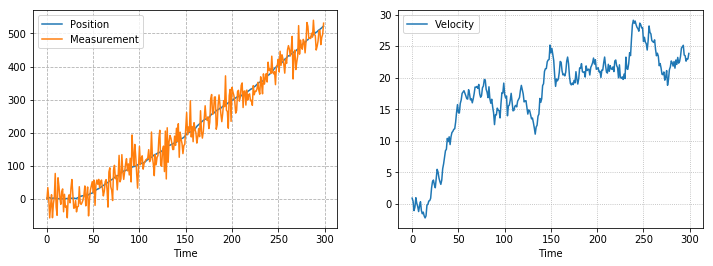

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,4), sharex=True)

ax[0].plot(x[0,:], label='Position')
ax[0].plot(z[0], label='Measurement')
ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].grid(True, linestyle='--')

ax[1].plot(x[1,:], label='Velocity')
ax[1].legend()
ax[1].set_xlabel('Time')
ax[1].grid(True, linestyle=':')
plt.show()